In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / 'util/'))
from qubit_templates import *
from functions import *
from ChipDesign import *

# Read configuration file

In [3]:
wafertype = "silicon" # silicon or sapphire
JJtype = "manhattan" # manhattan or dolan

common_config = load_config( f"config/common.yaml" )
config = load_config( f"config/{JJtype}_3D_{wafertype}.yaml" )
config = {**common_config, **config} # common config will be overwritten by value in the right 

outname = "ICEPP_mino_test"
if config["JJ_squid"]:
    outname += "sq" 
if config["JJ_bandage"]:
    outname += "bd" 



# Wafer design

In [4]:
wafer = device_Wafer( config )

# Place chip designs

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


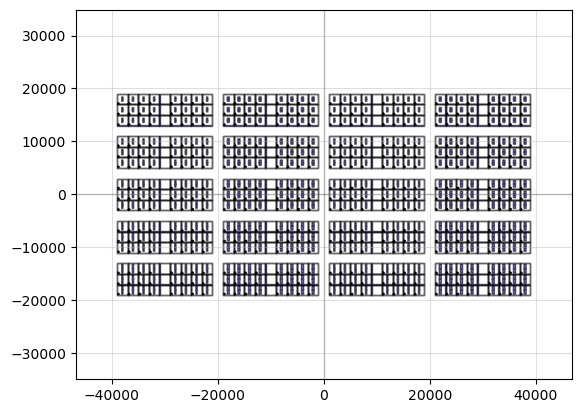

In [5]:
D = sweep_chipdesign( config )
D.center = (0,0)

wafer.add_ref(D)
qp(D)

# Place dicing marker

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


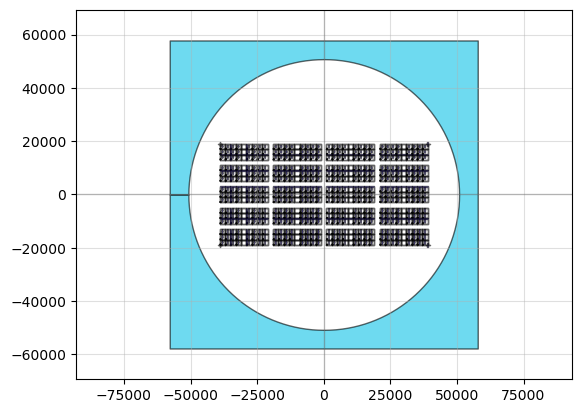

In [6]:

DicingMarker = device_DicingMarkers( config )

if config["Grid_sweep_type"] == "array":
    shape = np.array(config["Grid_sweep_array"], dtype=object).shape
    shape_x = shape[0] + config["Grid_sweep_gap_x"]*(shape[0]-1)
    shape_y = shape[1] + config["Grid_sweep_gap_y"]*(shape[1]-1)
    spacing_x = config["Frame_size_width"] * shape_x
    spacing_y = config["Frame_size_height"] * shape_y
elif config["Grid_sweep_type"] == "gridsweep":
    for i, array in enumerate(config["Grid_sweep_array"]):
        if i == 0:
            spacing_x = config["Frame_size_width"] * (len(array["x"]) + array["gap_x"]*(len(array["x"]) - 1))
            spacing_y = config["Frame_size_height"] * (len(array["y"]) + array["gap_y"]*(len(array["y"]) - 1))
        else:
            spacing_x = spacing_x * len(array["x"]) + config["Frame_size_width"] * array["gap_x"] * (len(array["x"]) - 1)
            spacing_y = spacing_y * len(array["y"]) + config["Frame_size_height"] * array["gap_y"] * (len(array["y"]) - 1)
else:
    raise ValueError("Incorrect Grid_sweep_type !!")

# wafer.add_ref(DicingMarker).center = (0, 0)

wafer.add_ref(DicingMarker).center = (-0.5*spacing_x, -0.5*spacing_y)
wafer.add_ref(DicingMarker).center = (-0.5*spacing_x,  0.5*spacing_y)
wafer.add_ref(DicingMarker).center = ( 0.5*spacing_x, -0.5*spacing_y)
wafer.add_ref(DicingMarker).center = ( 0.5*spacing_x,  0.5*spacing_y)


qp(wafer)

In [7]:
wafer.write_gds('output/' + outname)

'output/ICEPP_mino_test.gds'